In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
automobile_data = pd.read_csv('C:/Users/aanand/Desktop/Python-Data/automobile_data_processed.csv')
automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [4]:
automobile_subset = automobile_data[['horsepower','city-mpg',
                                     'highway-mpg','price']]

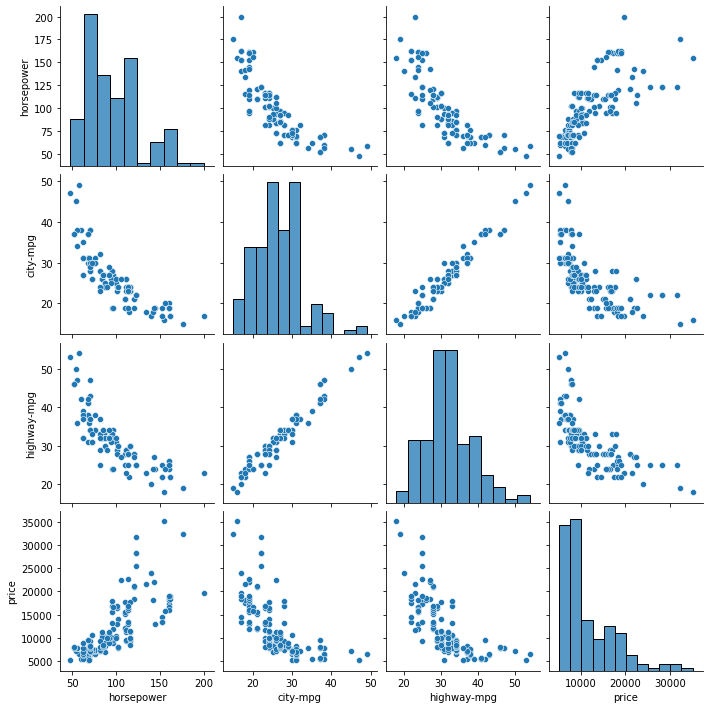

In [6]:
'''Plotting a pairplot to see relationship between 2 variables'''

sns.pairplot(automobile_subset)
plt.show()

<h3>Findings: 
1. Along the main diagonal - we have the histogram representation because it corresponds to 1 variaable (univariate)
2. By default, pairplot expresses all bivariate relationships in the form of a scatter plot
3. city-mpg VS horsepower - clear negative relatrionship as the horsepower increases, the mileage of the car fall
4. horsepower VS price - clear positive relationship as the horsepower increases, price increases too </h3>

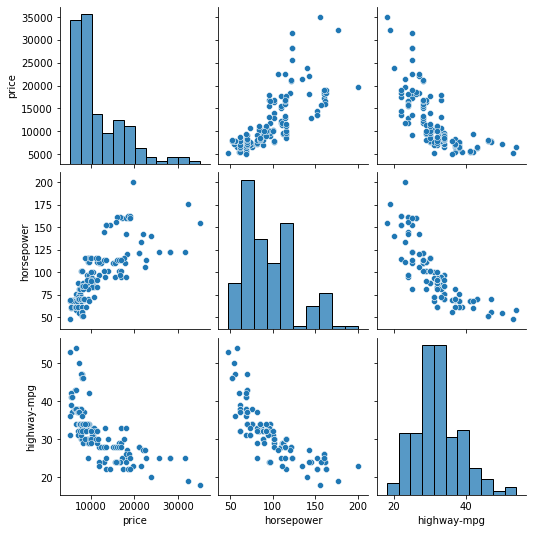

In [8]:
'''If we have a very large dataset with many many features and want to see pairwise relationship if some selected features'''

sns.pairplot(automobile_data, vars = ['price','horsepower','highway-mpg'])
plt.show()

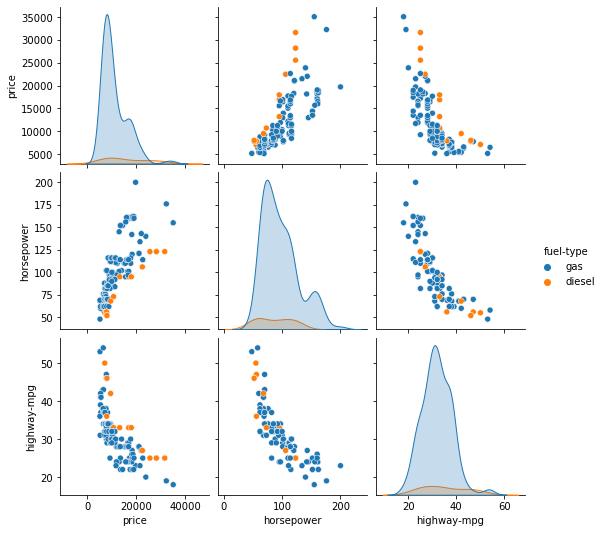

In [9]:
'''Showing additional dimension in pairplot, use hue'''
sns.pairplot(automobile_data, vars = ['price','horsepower','highway-mpg'],
            hue='fuel-type')
plt.show()

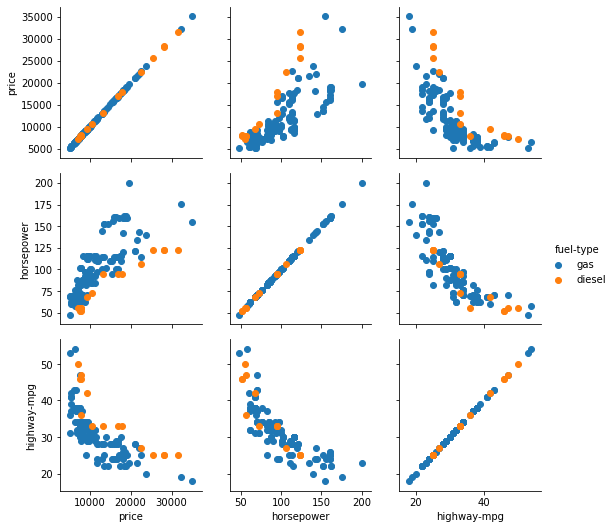

In [10]:
'''Pairgrid would show the same info as above but adding map function which specifies all the plot should be scatter plot'''
g = sns.PairGrid(automobile_data, 
                vars = ['price','horsepower','highway-mpg'],
                hue='fuel-type')

g.map(plt.scatter)
g.add_legend()
plt.show()

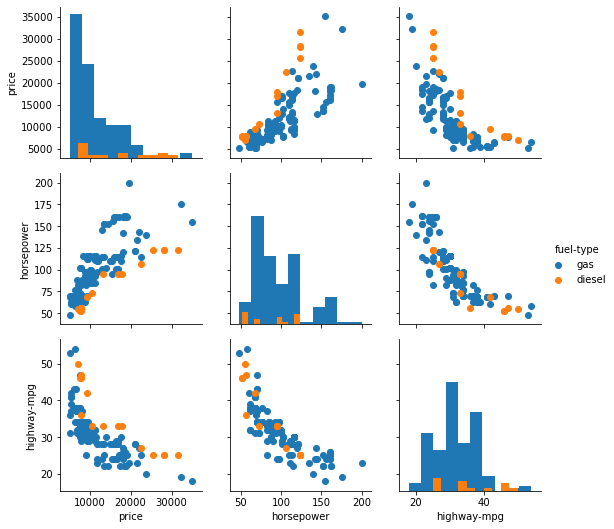

In [11]:
g = sns.PairGrid(automobile_data, 
                vars = ['price','horsepower','highway-mpg'],
                hue='fuel-type')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [12]:
automobile_corr = automobile_data[['engine-size','horsepower','peak-rpm',
                                  'city-mpg','highway-mpg','price']].corr()

automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


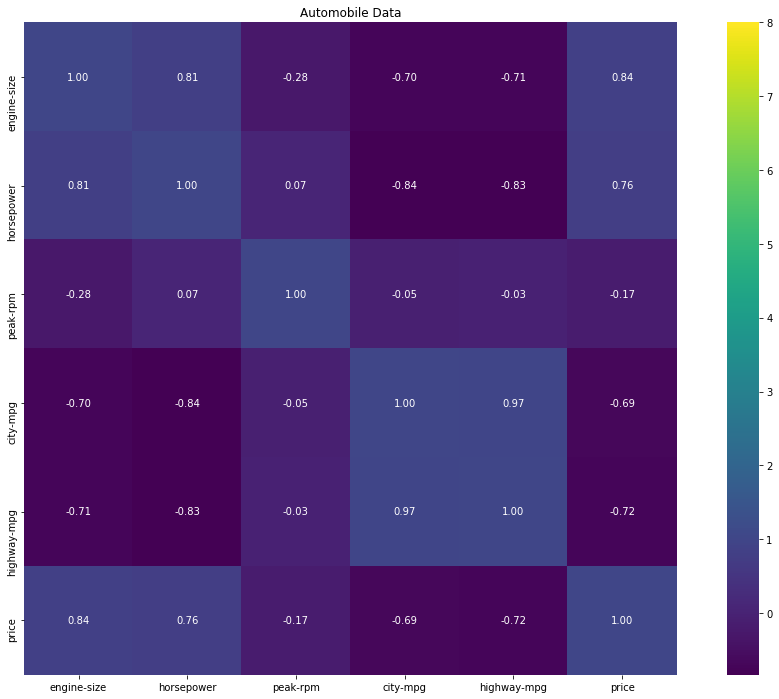

In [14]:
plt.figure(figsize=(18,12))

sns.heatmap(automobile_corr, vmax=8,square=True,
           annot=True,fmt='.2f',cmap='viridis')

plt.title('Automobile Data')
plt.show()